In [443]:
import sys
import os
# import h5py
import warnings
import numpy as np
import matplotlib.pyplot as plt
# import xarray as xr
import pandas as pd
# import scipy.signal
import seaborn as sns
# from scipy.stats import genextreme as gev, kstest
# from pyextremes import get_extremes, get_return_periods, EVA
import matplotlib.dates as mdates

warnings.filterwarnings("ignore")

sns.set(style='ticks', font_scale=1.25)

In [444]:
workdir = '../examples/test/outputs'

Depth = [0.01, 0.05, 0.15, 0.30,0.50,0.80,1.10,1.60,2.40, 3.20, 4.00, 5.00,7.00,9.00, 12.00, 15.00, 20.00, 25.00, 30.00, 40.00]

0 1981
1 1982
2 1983
3 1984
4 1985


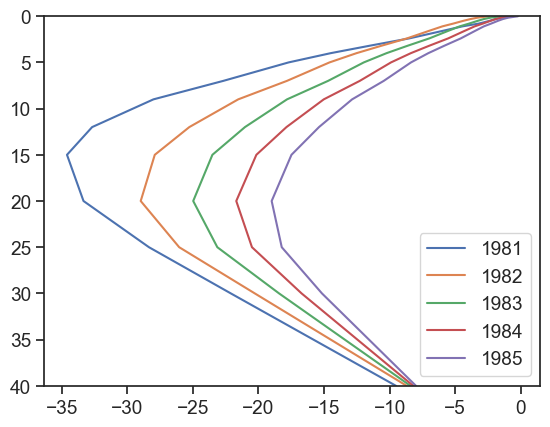

In [445]:
for i, yr in enumerate([1981, 1982, 1983, 1984, 1985]):

    dump0 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'da'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")
    dump1 = pd.read_csv(os.path.join(workdir, '01010'+str(yr)+'ds'), delim_whitespace=True, index_col = 1, date_format = "%d%m%Y")

    if i ==0 :

        out_da = dump0.copy()
        out_ds = dump1.copy()
    
    else:

        out_da = pd.concat([out_da, dump0])
        out_ds = pd.concat([out_ds, dump1])

    print(i, yr)

    TSOIL0 = dump1[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values
    
    plt.plot(TSOIL0[0:, ].mean(axis=0), Depth, label = str(yr))

plt.ylim([40, 0])
plt.legend()


-0.72033519

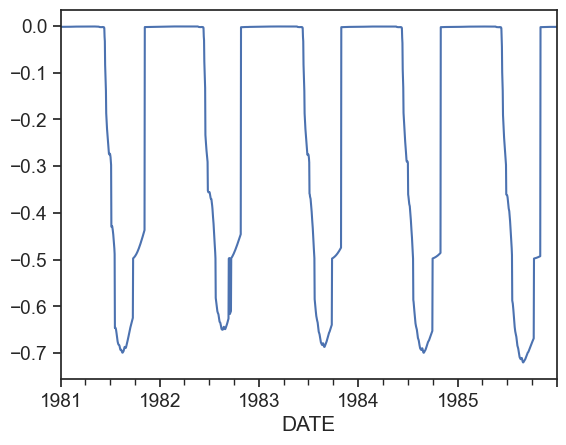

In [446]:
out_da['ACTV_LYR'][out_da['ACTV_LYR']<-8888] = np.nan
out_da['ACTV_LYR'].plot()
out_da['ACTV_LYR'].min()

<Axes: xlabel='DATE'>

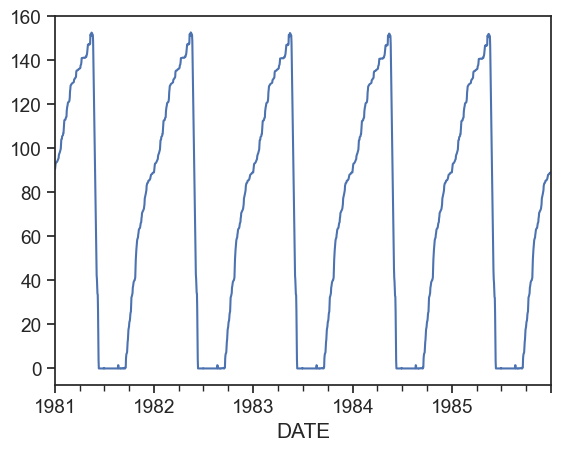

In [447]:
out_da['SNOWPACK'].plot()

In [448]:
out_ds.columns

Index(['DOY', 'HOUR', 'SOL_RADN', 'AIR_TEMP', 'HUM', 'WIND', 'PREC', 'SOIL_RN',
       'SOIL_LE', 'SOIL_H', 'SOIL_G', 'ECO_RN', 'ECO_LE', 'ECO_H', 'ECO_G',
       'TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20', 'TEMP_LITTER', 'TEMP_SNOW'],
      dtype='object')

In [449]:

TSOIL = out_ds[['TEMP_1', 'TEMP_2', 'TEMP_3', 'TEMP_4', 'TEMP_5', 'TEMP_6', 'TEMP_7',
       'TEMP_8', 'TEMP_9', 'TEMP_10', 'TEMP_11', 'TEMP_12', 'TEMP_13',
       'TEMP_14', 'TEMP_15', 'TEMP_16', 'TEMP_17', 'TEMP_18', 'TEMP_19',
       'TEMP_20']].values

print(TSOIL.shape)

(1826, 20)


Text(0, 0.5, 'Depth (m)')

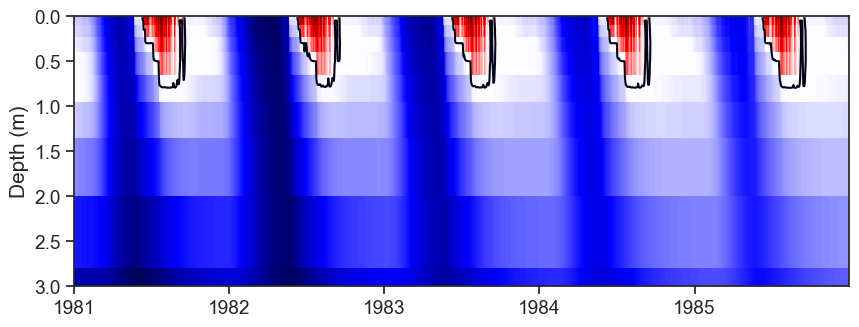

In [450]:
plt.figure(figsize=[10,3.5])
plt.pcolormesh(out_ds.index, Depth, TSOIL.T, cmap = 'seismic', vmax=15, vmin=-15)
plt.contour(out_ds.index, Depth, TSOIL.T, [0])
plt.ylim([3, 0])
plt.ylabel('Depth (m)')